In [ ]:
! pip install fastai
! pip install surprise
!pip install scikit-learn==1.0.1

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from surprise.model_selection import train_test_split
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate
from surprise import SVD
from fastai.collab import *
from fastai.tabular import *
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## AWS Lambda supports scikit-learn==1.0.1 version free of charge
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1C7yioHe3RDgbfZp3U8qTfZGeNR5_DJo4"})
downloaded.GetContentFile('category-lower-all-everything.txt')

# Loading the data
## Lower (Bottom attributes)

In [ ]:
df_lower = pd.read_csv('category-lower-all-everything.txt', sep=":")
df_lower.head()

,Unnamed: 0,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,total
0,img/Mineral_Wash_Mini_Skirt/img_00000001.jpg,0,0,0,1,0,0,0,0,0,1,1,0,0,0,3
1,img/Mineral_Wash_Mini_Skirt/img_00000002.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,img/Mineral_Wash_Mini_Skirt/img_00000003.jpg,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,img/Mineral_Wash_Mini_Skirt/img_00000004.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,img/Mineral_Wash_Mini_Skirt/img_00000005.jpg,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2


## Upper (Top Attributes)

In [ ]:
downloadedUpper = drive.CreateFile({'id':"1K5VK5yDoVqFRIbaY5KKaRApkK4up3h27"})
downloadedUpper.GetContentFile('category-upper-all-everything.txt')

In [ ]:
df_upper = pd.read_csv('category-upper-all-everything.txt', sep=":")
df_upper.head(3)

,Unnamed: 0,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,total
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2


## Cleaning the upper

In [ ]:
del df_upper['total']
df_upper = df_upper.iloc[: , 1:]
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Scaling

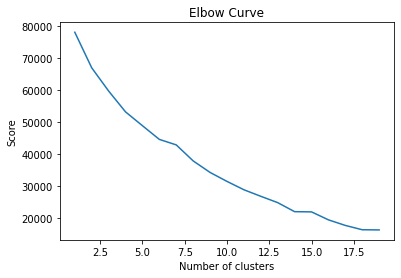

In [ ]:
SSE = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1500,n_init=10,random_state=0)
    kmeans.fit(df_upper)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,20),SSE)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [ ]:
## Feature Scaling
StandardScaler = StandardScaler()
df_upper_standardscalar = StandardScaler.fit_transform(df_upper)
df_upper_standardscalar

array([[-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165],
       [-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165],
       [-0.231355, -0.307651, -0.131505, -0.218336, ...,  6.016329, -0.175879, -0.163788, -0.163165],
       [-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165],
       ...,
       [-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165],
       [-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165],
       [-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165],
       [-0.231355, -0.307651, -0.131505, -0.218336, ..., -0.166214, -0.175879, -0.163788, -0.163165]])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_upper_standardscalar)
labels = kmeans.labels_
kmeans

KMeans(n_clusters=3, random_state=42)

In [ ]:
df_upper['label_kmeans'] = labels
df_upper

,t_floral,t_stripe,t_dot,f_lace,f_denim,f_chiffon,f_cotton,f_leather,f_fur,p_sleeveless,p_long-sleeve,p_collar,p_pocket,p_v-neck,p_button,p_hooded,p_zipper,label_kmeans
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139704,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
139705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
histCounter=Counter(df_upper["label_kmeans"])
histCounter

Counter({0: 129652, 1: 3767, 2: 6290})

<BarContainer object of 3 artists>

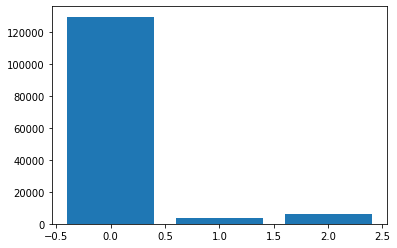

In [ ]:
plt.bar(histCounter.keys(), histCounter.values())


## Predicting the clusters with the upper incomming attributes 

In [ ]:
import pickle
filename = 'df_upper_kmeans.pkl'
pickle.dump(kmeans, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

KMeans(n_clusters=3, random_state=42)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min
from collections import Counter

pred=[1, 1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	0,	0,	1,	1,	1,	0]
pred=np.asarray(pred)
loaded_model_test=loaded_model.fit(pred.reshape(-1, 1))
closest, _ = pairwise_distances_argmin_min(loaded_model.cluster_centers_, pred.reshape(-1, 1))
closest
b = Counter(closest)
b.most_common(1)[0][0]

2

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(df_upper_standardscalar)
principalDf = pd.DataFrame(data = reduced_data
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.198904,-0.385052
1,-0.198904,-0.385052
2,-0.543660,0.700057
3,-0.198904,-0.385052
4,-0.198904,-0.385052
...,...,...
139704,-0.428083,2.321864
139705,-0.198904,-0.385052
139706,-0.198904,-0.385052
139707,-0.198904,-0.385052


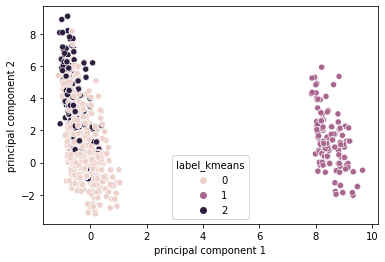

In [ ]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_upper['label_kmeans'], data=principalDf)

## Cleaning the lower

In [ ]:
del df_lower['total']
df_lower = df_lower.iloc[: , 1:]
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_lower.to_csv("df_lower.csv")

In [ ]:
## Feature Scaling
df_lower_standardscalar = StandardScaler.fit_transform(df_lower)
df_lower_standardscalar

array([[-0.275515, -0.246248, -0.143643,  2.402641, ...,  6.291278, -0.230676, -0.186309, -0.172196],
       [-0.275515, -0.246248, -0.143643, -0.416209, ..., -0.15895 , -0.230676, -0.186309, -0.172196],
       [-0.275515, -0.246248, -0.143643,  2.402641, ..., -0.15895 , -0.230676, -0.186309, -0.172196],
       [-0.275515, -0.246248, -0.143643, -0.416209, ..., -0.15895 ,  4.335076, -0.186309, -0.172196],
       ...,
       [-0.275515, -0.246248, -0.143643,  2.402641, ..., -0.15895 , -0.230676, -0.186309, -0.172196],
       [-0.275515, -0.246248, -0.143643,  2.402641, ..., -0.15895 , -0.230676, -0.186309, -0.172196],
       [-0.275515, -0.246248, -0.143643, -0.416209, ..., -0.15895 , -0.230676, -0.186309, -0.172196],
       [-0.275515, -0.246248, -0.143643,  2.402641, ..., -0.15895 , -0.230676, -0.186309, -0.172196]])

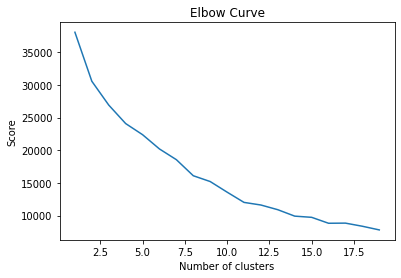

In [ ]:
SSE = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1500,n_init=10,random_state=0)
    kmeans.fit(df_lower)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,20),SSE)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [ ]:
kmeans_lower = KMeans(n_clusters=12, random_state=42).fit(df_lower_standardscalar)
labels_lower = kmeans.labels_

In [ ]:
df_lower['label_kmeans'] = labels_lower
df_lower

,t_floral,t_stripe,t_dot,f_denim,f_leather,f_cotton,f_knit,f_pleated,s_fit,s_pencil,s_midi,s_mini,s_maxi,p_zipper,label_kmeans
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,11
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58958,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58960,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
histCounter=Counter(df_lower["label_kmeans"])
histCounter

Counter({0: 1508,
         1: 7832,
         2: 28004,
         3: 3480,
         4: 1944,
         5: 1917,
         6: 1880,
         7: 2482,
         8: 1817,
         9: 321,
         10: 1468,
         11: 794,
         12: 1247,
         13: 1045,
         14: 552,
         15: 257,
         16: 808,
         17: 345,
         18: 1262})

<BarContainer object of 19 artists>

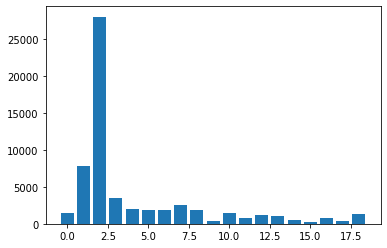

In [ ]:
plt.bar(histCounter.keys(), histCounter.values())

## Predicting the incomming clusters based on the lower attributes

In [ ]:
import pickle
filename = 'df_lower_kmeans.pkl'
pickle.dump(kmeans_lower, open(filename, 'wb'))
loaded_model_lower = pickle.load(open(filename, 'rb'))
loaded_model_lower

KMeans(n_clusters=12, random_state=42)

In [ ]:
## predicting the clusters for the top labels
from sklearn.metrics import pairwise_distances_argmin_min
from collections import Counter

pred=[0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	1,	0,	1,	0]
pred=np.asarray(pred)
loaded_model_test=loaded_model_lower.fit(pred.reshape(-1, 1))
closest, _ = pairwise_distances_argmin_min(loaded_model_lower.cluster_centers_, pred.reshape(-1, 1))
closest
b = Counter(closest)
b.most_common(1)[0][0]

0

In [ ]:
centers_lower = kmeans_lower.cluster_centers_

In [ ]:
reduced_data_lower = PCA(n_components=2).fit_transform(df_lower_standardscalar)
principalDf_lower = pd.DataFrame(data = reduced_data_lower
             , columns = ['principal component 1', 'principal component 2'])
principalDf_lower

,principal component 1,principal component 2
0,2.130425,0.825016
1,-0.251744,-0.191129
2,-1.548104,-0.314137
3,0.919876,0.552067
4,-0.376484,0.429059
...,...,...
58958,-1.548104,-0.314137
58959,-1.548104,-0.314137
58960,-1.548104,-0.314137
58961,-0.251744,-0.191129


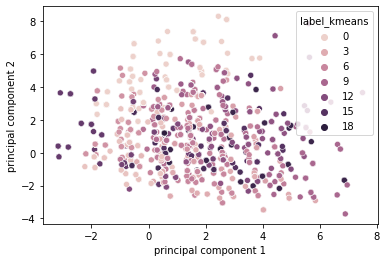

In [ ]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue=df_lower['label_kmeans'], data=principalDf_lower)

## Top and bottom rating table

In [ ]:
downloadedRating = drive.CreateFile({'id':"12KSKMrg_K2LOJLOeQMBAJ6eaJxoLZuJ3"})
downloadedRating.GetContentFile('rating1.csv')

In [ ]:
df_top_bottom_rating = pd.read_csv('rating1.csv')
df_top_bottom_rating

,Unnamed: 0,top,bottom,itemRating
0,0,8188,52013,4.0
1,1,9532,39863,5.0
2,2,2541,55868,1.0
3,3,25719,52417,4.0
4,4,25701,13091,5.0
...,...,...,...,...
70,70,60532,5934,1.0
71,71,138258,55322,5.0
72,72,5850,53159,3.0
73,73,90409,58203,3.0


In [ ]:
for i, j in df_top_bottom_rating["top"].iteritems():
    df_top_bottom_rating["topClusterId"]=df_upper["label_kmeans"]

In [ ]:
for i, j in df_top_bottom_rating["bottom"].iteritems():
    df_top_bottom_rating["bottomClusterId"]=df_lower["label_kmeans"]

## Cluster mapping

In [ ]:
df_top_bottom_rating

,Unnamed: 0,top,bottom,itemRating,topClusterId,bottomClusterId
0,0,8188,52013,4.0,0,11
1,1,9532,39863,5.0,0,2
2,2,2541,55868,1.0,0,1
3,3,25719,52417,4.0,0,4
4,4,25701,13091,5.0,0,1
...,...,...,...,...,...,...
70,70,60532,5934,1.0,0,10
71,71,138258,55322,5.0,0,18
72,72,5850,53159,3.0,0,1
73,73,90409,58203,3.0,0,11


In [ ]:
cluster_mapping=df_top_bottom_rating[["topClusterId", "bottomClusterId", "itemRating"]]
cluster_mapping

,topClusterId,bottomClusterId,itemRating
0,0,11,4.0
1,0,2,5.0
2,0,1,1.0
3,0,4,4.0
4,0,1,5.0
...,...,...,...
70,0,10,1.0
71,0,18,5.0
72,0,1,3.0
73,0,11,3.0


In [ ]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterId','bottomClusterId'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)

## Collaborative Filtering

In [ ]:
cluster_mapping_average=cluster_mapping.groupby(['topClusterId','bottomClusterId'])['itemRating'].mean().reset_index()
cluster_mapping_average=pd.DataFrame(cluster_mapping_average)
cluster_mapping_average

,topClusterId,bottomClusterId,itemRating
0,0,0,3.000000
1,0,1,3.142857
2,0,2,3.333333
3,0,4,4.000000
4,0,5,2.000000
5,0,7,3.000000
6,0,8,5.000000
7,0,10,1.000000
8,0,11,3.875000
9,0,12,2.500000


## Creating a ratings matrix

In [ ]:
df_ratings = cluster_mapping_average.pivot(index='topClusterId', columns='bottomClusterId', values='itemRating')
df_ratings
df_ratings_clean = df_ratings.fillna(0)
df_ratings_clean.head(2)

bottomClusterId,0,1,2,4,5,7,8,10,11,12,14,18
topClusterId,,,,,,,,,,,,
0,3.0,3.142857,3.333333,4.0,2.0,3.0,5.0,1.0,3.875,2.5,4.0,2.769231
2,0.0,3.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000


Algorithm for Collaborative filtering

In [ ]:
## Normalizing the matrix
normalised_mat = df_ratings_clean - np.asarray([(np.mean(df_ratings_clean, 1))]).T
normalised_mat.head(2)

bottomClusterId,0,1,2,4,5,7,8,10,11,12,14,18
topClusterId,,,,,,,,,,,,
0,-0.135035,0.007822,0.198298,0.864965,-1.135035,-0.135035,1.864965,-2.135035,0.739965,-0.635035,0.864965,-0.365804
2,-0.277778,3.055556,-0.277778,-0.277778,-0.277778,-0.277778,-0.277778,-0.277778,-0.277778,-0.277778,-0.277778,-0.277778


In [ ]:
A = normalised_mat.T / np.sqrt(df_ratings_clean.shape[0] - 1)

In [ ]:
U, S, V = np.linalg.svd(A)

In [ ]:
def top_cosine_similarity(data, clusterId, top_n=5):
    index = clusterId 
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

In [ ]:
print("U:", U, "\n", "S:", S, "\n", "V:", V)

U: [[-0.040171  0.086417  0.053308  0.245189 ...  0.209212 -0.186543  0.245189 -0.109052]
 [ 0.015068 -0.957309  0.091852  0.108007 ...  0.104978  0.071659  0.108007  0.078183]
 [ 0.056116  0.087933  0.992739 -0.018619 ... -0.016489  0.006937 -0.018619  0.00235 ]
 [ 0.248691  0.090964 -0.017921  0.935012 ... -0.056163  0.040913 -0.064988  0.021905]
 ...
 [ 0.212583  0.090396 -0.015922 -0.056294 ...  0.951276  0.034542 -0.056294  0.018238]
 [-0.184602  0.084144  0.006065  0.039342 ...  0.033102  0.964468  0.039342 -0.022093]
 [ 0.248691  0.090964 -0.017921 -0.064988 ... -0.056163  0.040913  0.935012  0.021905]
 [-0.106831  0.085368  0.001759  0.020616 ...  0.01708  -0.021811  0.020616  0.985804]] 
 S: [3.461497 3.191364] 
 V: [[ 0.999895  0.01451 ]
 [ 0.01451  -0.999895]]


Saving the model

In [ ]:
def similar_clusters(data, clusterId, top_indexes, topType):
  result_similar_clusters=[]
  if topType=="upper":
    data[data.topClusterId == clusterId].topClusterId.values[0]
    for id in top_indexes + 1:
      similar_clusters=data[data.topClusterId == id].topClusterId.values[0]
      result_similar_clusters.append(similar_clusters)
    return result_similar_clusters
  elif topType=="lower":
    data[data.bottomClusterId == clusterId].bottomClusterId.values[0]
    for id in top_indexes + 1:
      similar_clusters=data[data.bottomClusterId == id].bottomClusterId.values[0]
      result_similar_clusters.append(similar_clusters)
    return result_similar_clusters


In [ ]:
k = 50
topClusterRating = 0 # (predicting bottom cluster)
top_n = 5
sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, topClusterRating, top_n)
indexes

array([0, 1])

In [ ]:
clusterRecommendation=similar_clusters(cluster_mapping_average, topClusterRating, indexes, "lower")
clusterRecommendation

[1, 2]

In [ ]:
##Go to cluster and get all the attributes
def getTheClusterItems(clusterRecommendation, itemType):
  if itemType=="upper":
    df_topClusterResult=[]
    for i in clusterRecommendation:
      topItems_df=df_top_bottom_rating[df_top_bottom_rating["topClusterId"]==i].sort_values('itemRating', ascending=False)
      df_topClusterResult.append(topItems_df)
    df_topClusterResult = pd.concat(df_topClusterResult)
    df_topClusterResult=df_topClusterResult.sort_values('itemRating', ascending=False)
    return df_topClusterResult[0:5]
  if itemType=="lower":
    df_bottomClusterResult=[]
    for i in clusterRecommendation:
      topItems_df=df_top_bottom_rating[df_top_bottom_rating["bottomClusterId"]==i].sort_values('itemRating', ascending=False)
      df_bottomClusterResult.append(topItems_df)
    df_bottomClusterResult = pd.concat(df_bottomClusterResult)
    df_bottomClusterResult=df_bottomClusterResult.sort_values('itemRating', ascending=False)
    return df_bottomClusterResult[0:5]

In [ ]:
getTheClusterItems(clusterRecommendation, "lower")

,Unnamed: 0,top,bottom,itemRating,topClusterId,bottomClusterId
32,32,31466,18704,5.0,0,1
1,1,9532,39863,5.0,0,2
43,43,128471,15463,5.0,0,2
9,9,30740,34518,5.0,0,1
16,16,2413,25041,5.0,0,2


In [ ]:
from fastai.collab import *
from fastai.tabular import *
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_top_bottom_rating, df_top_bottom_rating, test_size=0.33, random_state=10)

In [ ]:
databunch = CollabDataBunch.from_df(X_train, test = y_test, valid_pct = 0.33, bs=20)

In [ ]:
learn = collab_learner(databunch, n_factors=50, y_range=(0, 5))
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(35, 50)
  (i_weight): Embedding(35, 50)
  (u_bias): Embedding(35, 1)
  (i_bias): Embedding(35, 1)
)

In [ ]:
import joblib
filename = 'cf.pkl'
learn.save(filename)

In [ ]:
loaded_model = learn.load(filename)
loaded_model.model

EmbeddingDotBias(
  (u_weight): Embedding(35, 50)
  (i_weight): Embedding(35, 50)
  (u_bias): Embedding(35, 1)
  (i_bias): Embedding(35, 1)
)